# Sir Sly Lyrics


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
lyrics = pd.read_csv("sirsly_lyrics.csv")
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes


In [3]:
#We perform a few simple text cleaning tasks. We convert characters to lower case, eliminate the new lines, and drop all punctuation.

lyrics['clean text'] = (
    lyrics['Lyrics']
    .str.replace("\n", " ")
    .str.lower()
    .str.replace(r"[^a-z\s]", " ")
)
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video,clean text
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes,ah ah ah ah ah ah ah ah ah ah ah ah i was ...
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes,go ahead and stand up straight straight again...
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes,mouth is made of metal metal metal pocket f...
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes,i m selfish never didn t think about anyone b...
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes,i m running tired of this complex i was jeal...


We can then use sklearn to create a word vector for each speech, which contains the counts of all words in a speech. By all words, we mean the set of all unique words used across all 226 speeches. We can think of each word vector as a record so we have 226 records and thousands of variables (word counts).
We can try to examine the relationship between speeches by reducing the dimensionality of the data. We take an approach that is a kind of Principle Component Analysis for word vectors. Specifically, we measure the distance between speeches via a metric on the word vectors.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
tfidf = vec.fit_transform(lyrics['clean text'])

In [5]:
np.random.seed(42)
import scipy as sp
(u, s, vt) = sp.sparse.linalg.svds(tfidf, k=2)

This gives us a 226 by 226 matrix of the distances between all pairs of speeches. Then we use SVD to decompose the matrix and plot the first two column vectors of the resulting decomposition (these are similar in nature to the first two principle components).

In [8]:
#df['Year'] = df['Date'].str[-4:].astype('int')
lyrics['x'] = u[:,0]
lyrics['y'] = u[:,1]
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video,clean text,x,y
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes,ah ah ah ah ah ah ah ah ah ah ah ah i was ...,-0.020049,0.155280
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes,go ahead and stand up straight straight again...,0.263933,0.198070
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes,mouth is made of metal metal metal pocket f...,0.089975,0.145100
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes,i m selfish never didn t think about anyone b...,0.326971,0.209575
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes,i m running tired of this complex i was jeal...,0.274546,0.260304


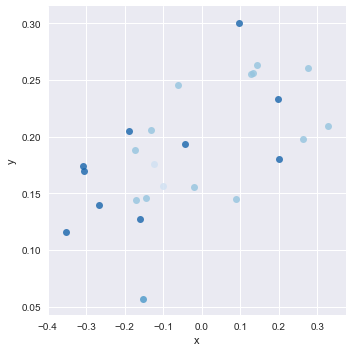

In [9]:
sns.lmplot(x = 'x', y = 'y', data = lyrics, hue='Year', legend=False, fit_reg=False, palette="Blues")

In [10]:
!pip install plotly

    100% |████████████████████████████████| 1.0MB 502kB/s ta 0:00:01
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /Users/danielleip/Library/Caches/pip/wheels/c9/c4/00/a80b040dd8c9301d29f7153881c96edf1cd8561977ec440941
Successfully built plotly


In [11]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [13]:
colors = np.array(["rgba({0},{1},{2},1)".format(*c) for c in sns.color_palette("Blues", len(lyrics))])
colors[-1] = "rgba(.99,.5,.2,1.)"
py.iplot([go.Scatter(x = lyrics['x'], y = lyrics['y'], mode='markers', marker=dict(color=colors), text=lyrics['Title'])])